### Goal
Compare gene expression of recount2 and Expecto.
 - recount2 -> https://jhubiostatistics.shinyapps.io/recount/
 - expecto -> https://www.nature.com/articles/s41588-018-0160-6

Expecto GTEx entries are computed as:  log(mean(over gene expression acrros tissues + 0.0001))
- the geneanno.exp.csv contains 218 tissues, where the first 53 are GTex entries
- GTEx v6 (this is done using hg19)
- GENCODE v24 (this relates to GRCh38.p5)
- lift anno to hg19/GRCh37

Recount2 GTEx data was downloaded using the Bioconductor package recount. Please check /s/project/gtex-processed/recount/loadGtexData.R
- RSE gene - The RangedSummarizedExperiment object for the counts summarized at the gene level using the Gencode v25 (GRCh38.p7, CHR) annotation 

Additionally - compare Expecto and GTEx V6 (direct download) - this should have a higher correlation

### Conclusions
recount2 and Expecto have a data correlation of ~95%.

Expecto and GTEx v6 have a lower correlation as expected ~85%

In [1]:
%matplotlib inline
import os

import pandas as pd
import scipy.stats as s

#### 1. Expecto data

In [2]:
# data
expecto_counts_file = "/s/project/avsec/ExPecto/resources/geneanno.exp.csv"
expecto_anno_file = "/s/project/avsec/ExPecto/resources/geneanno.csv"

In [3]:
expecto_anno = pd.DataFrame(pd.read_csv(os.path.abspath(expecto_anno_file), header=0, delimiter=",", index_col=0))
expecto_anno[:5]

,symbol,seqnames,strand,TSS,CAGE_representative_TSS,type
id,,,,,,
ENSG00000000003,TSPAN6,chrX,-,99894988,99891748,protein_coding
ENSG00000000005,TNMD,chrX,+,99839799,99839933,protein_coding
ENSG00000000419,DPM1,chr20,-,49575092,49575069,protein_coding
ENSG00000000457,SCYL3,chr1,-,169863408,169863037,protein_coding
ENSG00000000460,C1orf112,chr1,+,169631245,169764186,protein_coding


In [4]:
expecto_counts = pd.DataFrame(pd.read_csv(os.path.abspath(expecto_counts_file), header=0, delimiter=",", index_col=0))
expecto_counts.index = expecto_anno.index
expecto_counts = expecto_counts.iloc[:,:53]
expecto_counts.shape

(24339, 53)

#### 2. Recount2 data

In [5]:
# data
recount2_counts_file = "/s/project/gtex-processed/recount/version2/recount_mean_tissues.csv"

In [6]:
recount2 = pd.DataFrame(pd.read_csv(os.path.abspath(recount2_counts_file), header=0, delimiter="\t", index_col=0))

# ignore ensembl id version
recount2.index.name = 'ensemblid'
new_index = [item.split(".")[0] for item in recount2.index.tolist()]
recount2.set_index([new_index],inplace=True,drop=True)

# remove 'Cells-Leukemiacellline(CML)' - column
recount2.drop(['Cells - Leukemia cell line (CML)'], axis=1, inplace=True)
recount2.shape

(58037, 53)

#### 3. Compare
Keep only rows with same annotation (ignore ensembl id version).
Per tissue do spearman correlation

In [7]:
recount2.columns.values.tolist()

['Adipose - Subcutaneous',
 'Adipose - Visceral (Omentum)',
 'Adrenal Gland',
 'Artery - Aorta',
 'Artery - Coronary',
 'Artery - Tibial',
 'Bladder',
 'Brain - Amygdala',
 'Brain - Anterior cingulate cortex (BA24)',
 'Brain - Caudate (basal ganglia)',
 'Brain - Cerebellar Hemisphere',
 'Brain - Cerebellum',
 'Brain - Cortex',
 'Brain - Frontal Cortex (BA9)',
 'Brain - Hippocampus',
 'Brain - Hypothalamus',
 'Brain - Nucleus accumbens (basal ganglia)',
 'Brain - Putamen (basal ganglia)',
 'Brain - Spinal cord (cervical c-1)',
 'Brain - Substantia nigra',
 'Breast - Mammary Tissue',
 'Cells - EBV-transformed lymphocytes',
 'Cells - Transformed fibroblasts',
 'Cervix - Ectocervix',
 'Cervix - Endocervix',
 'Colon - Sigmoid',
 'Colon - Transverse',
 'Esophagus - Gastroesophageal Junction',
 'Esophagus - Mucosa',
 'Esophagus - Muscularis',
 'Fallopian Tube',
 'Heart - Atrial Appendage',
 'Heart - Left Ventricle',
 'Kidney - Cortex',
 'Liver',
 'Lung',
 'Minor Salivary Gland',
 'Muscle - Sk

In [8]:
expecto_counts.columns.values.tolist()

['Adipose_Subcutaneous',
 'Adipose_Visceral_Omentum',
 'Adrenal_Gland',
 'Artery_Aorta',
 'Artery_Coronary',
 'Artery_Tibial',
 'Bladder',
 'Brain_Amygdala',
 'Brain_Anterior_cingulate_cortex_BA24',
 'Brain_Caudate_basal_ganglia',
 'Brain_Cerebellar_Hemisphere',
 'Brain_Cerebellum',
 'Brain_Cortex',
 'Brain_Frontal_Cortex_BA9',
 'Brain_Hippocampus',
 'Brain_Hypothalamus',
 'Brain_Nucleus_accumbens_basal_ganglia',
 'Brain_Putamen_basal_ganglia',
 'Brain_Spinal_cord_cervical_c1',
 'Brain_Substantia_nigra',
 'Breast_Mammary_Tissue',
 'Cells_EBV-transformed_lymphocytes',
 'Cells_Transformed_fibroblasts',
 'Cervix_Ectocervix',
 'Cervix_Endocervix',
 'Colon_Sigmoid',
 'Colon_Transverse',
 'Esophagus_Gastroesophageal_Junction',
 'Esophagus_Mucosa',
 'Esophagus_Muscularis',
 'Fallopian_Tube',
 'Heart_Atrial_Appendage',
 'Heart_Left_Ventricle',
 'Kidney_Cortex',
 'Liver',
 'Lung',
 'Minor_Salivary_Gland',
 'Muscle_Skeletal',
 'Nerve_Tibial',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'S

In [9]:
joined_df = recount2.join(expecto_counts, how='inner', lsuffix='_left', rsuffix='_right')
joined_df.shape # total of 24048 genes could be mapped

(24048, 106)

In [10]:
recount2 = joined_df.iloc[:,:53]
expecto_counts = joined_df.iloc[:,53:]
recount2.shape, expecto_counts.shape

((24048, 53), (24048, 53))

In [48]:
colnames = expecto_counts.columns.values.tolist()
corr = []
pval = []
labels = []
for i in range(recount2.shape[1]):    
    corr.append(s.spearmanr(recount2.iloc[:,i].values,expecto_counts.iloc[:,i].values).correlation)
    pval.append(s.spearmanr(recount2.iloc[:,i].values,expecto_counts.iloc[:,i].values).pvalue)
    labels.append(colnames[i])
    print(corr[len(corr)-1],labels[len(labels)-1])

0.9531563172889118 Adipose_Subcutaneous
0.9543648963349054 Adipose_Visceral_Omentum
0.9562652074146363 Adrenal_Gland
0.95670190294846 Artery_Aorta
0.9547170609129281 Artery_Coronary
0.9570476855003225 Artery_Tibial
0.9514292441883601 Bladder_right
0.9459399656838946 Brain_Amygdala
0.9485657077186613 Brain_Anterior_cingulate_cortex_BA24
0.9466448667904716 Brain_Caudate_basal_ganglia
0.9531391974326197 Brain_Cerebellar_Hemisphere
0.9542850988623258 Brain_Cerebellum
0.948648381184868 Brain_Cortex
0.9488108588982844 Brain_Frontal_Cortex_BA9
0.9458264020790921 Brain_Hippocampus
0.9436486720640865 Brain_Hypothalamus
0.947328095075808 Brain_Nucleus_accumbens_basal_ganglia
0.947519215086288 Brain_Putamen_basal_ganglia
0.9485271799049478 Brain_Spinal_cord_cervical_c1
0.9470473687444956 Brain_Substantia_nigra
0.9510270611291647 Breast_Mammary_Tissue
0.9601503342709348 Cells_EBV-transformed_lymphocytes
0.9610398582303343 Cells_Transformed_fibroblasts
0.9508220392838517 Cervix_Ectocervix
0.9499949

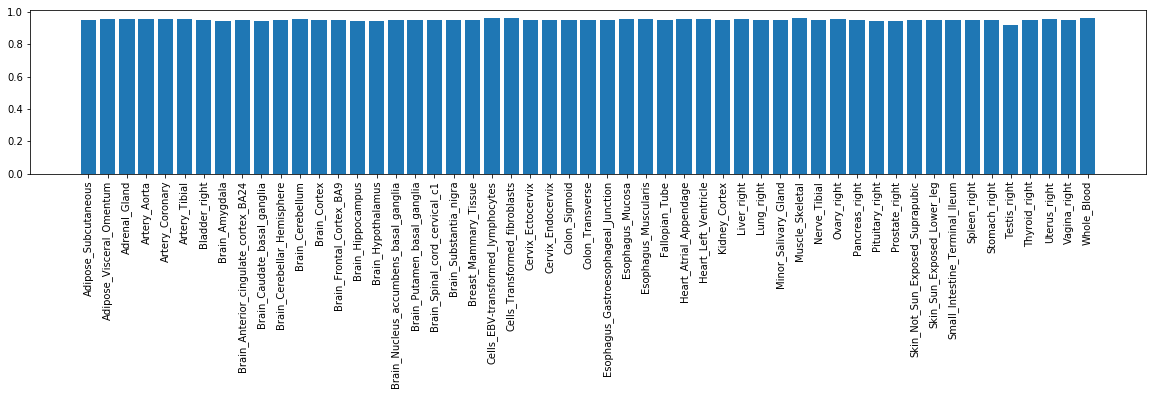

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,3))
plt.bar(labels, corr, align='center')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.show()


#### 4. Compare Expecto and GTEx V6

For this we compute for the GTEx the log(mean) across individuals for each tissue in the same manner as for recount2 data

In [60]:
gtex_file = "/s/project/gtex-processed/gene_counts_v6/recount_mean_tissues.csv"
gtex = pd.DataFrame(pd.read_csv(os.path.abspath(gtex_file), header=0, delimiter="\t", index_col=0))

In [61]:
# ignore ensembl id version
new_index = [item.split(".")[0] for item in gtex.index.tolist()]
gtex.set_index([new_index],inplace=True,drop=True)
gtex.shape

(56318, 53)

In [62]:
joined_df = gtex.join(expecto_counts, how='inner', lsuffix='_left', rsuffix='_right')
joined_df.shape # total of 24048 genes could be mapped

(24048, 106)

In [63]:
gtex = joined_df.iloc[:,:53]
gtex[gtex < 0] = 0
expecto_counts = joined_df.iloc[:,53:]
gtex.shape, expecto_counts.shape

((24048, 53), (24048, 53))

In [65]:
colnames = expecto_counts.columns.values.tolist()
corr = []
pval = []
labels = []
for i in range(recount2.shape[1]):    
    corr.append(s.spearmanr(gtex.iloc[:,i].values,expecto_counts.iloc[:,i].values).correlation)
    pval.append(s.spearmanr(gtex.iloc[:,i].values,expecto_counts.iloc[:,i].values).pvalue)
    labels.append(colnames[i])
    print(corr[len(corr)-1],labels[len(labels)-1])

0.8952591349441924 Adipose_Subcutaneous
0.8964848389383124 Adipose_Visceral_Omentum
0.8772018839536213 Adrenal_Gland
0.8891792476462812 Artery_Aorta
0.9063816506334874 Artery_Coronary
0.8942938528669563 Artery_Tibial
0.9085477965424892 Bladder_right
0.8722220767315768 Brain_Amygdala
0.8638370387353081 Brain_Anterior_cingulate_cortex_BA24
0.8734256527129862 Brain_Caudate_basal_ganglia
0.8491423829538435 Brain_Cerebellar_Hemisphere
0.842411282891241 Brain_Cerebellum
0.8625474340093346 Brain_Cortex
0.8566182856824294 Brain_Frontal_Cortex_BA9
0.8759578654122488 Brain_Hippocampus
0.8683784155631306 Brain_Hypothalamus
0.8569449324788193 Brain_Nucleus_accumbens_basal_ganglia
0.8735851894502166 Brain_Putamen_basal_ganglia
0.8820827983697189 Brain_Spinal_cord_cervical_c1
0.866776680504035 Brain_Substantia_nigra
0.9022794456267104 Breast_Mammary_Tissue
0.7994628016542452 Cells_EBV-transformed_lymphocytes
0.8482243698022637 Cells_Transformed_fibroblasts
0.8957097198033516 Cervix_Ectocervix
0.8955

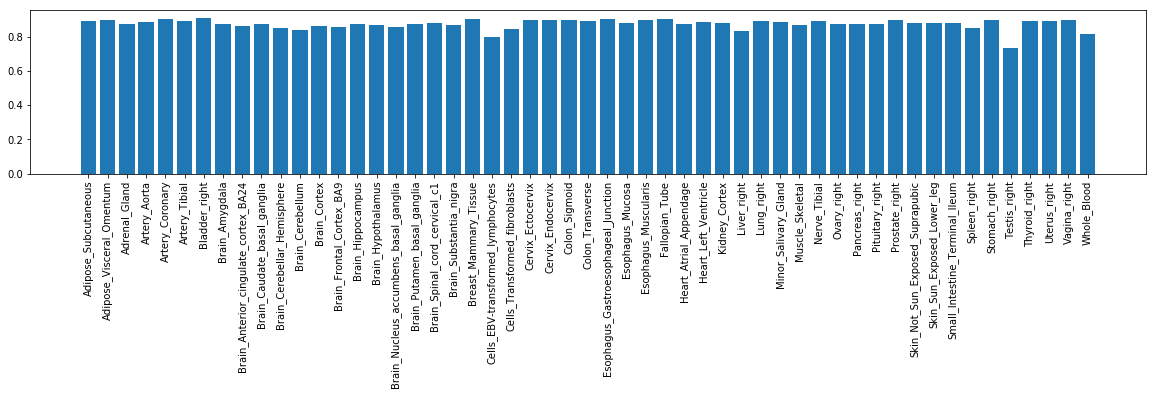

In [66]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,3))
plt.bar(labels, corr, align='center')
plt.xticks(range(len(labels)), labels, rotation=90)
plt.show()